In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import emcee

In [2]:
font = {'size'   : 15, 'family':'sans-serif'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import getdist
import IPython
from getdist import plots, MCSamples
import getdist.plots      as     gdplt

In [3]:
from getdist.mcsamples import loadMCSamples

samples_fs_bao_desipipe = loadMCSamples('/global/cfs/cdirs/desicollab/users/hernannb/__FOLPS_tutorial/part3/chains/fs/cobaya/camb/run/base_mnu/desi-folpsv2-fs-bao-all_schoneberg2024-bbn_planck2018-ns10/chain',\
no_cache=True, settings={'ignore_rows':0.45, 'contours': [0.68, 0.95]})

/global/cfs/cdirs/desicollab/users/hernannb/__FOLPS_tutorial/part3/chains/fs/cobaya/camb/run/base_mnu/desi-folpsv2-fs-bao-all_schoneberg2024-bbn_planck2018-ns10/chain.1.txt
Removed 0.45 as burn in


In [4]:
import cobaya
import emcee
import getdist
import scipy
#from lssdesi.cosmo import desi_fiducial_cosmo
#from lssdesi.dataset import Syntheticv1Dataset, Y1v1p2BlindedDataset, SecondGenCubicBoxDataset, SecondGenY1Completev4_1Dataset
#from lssdesi.desifit import add_derived_param, DESIFitConfig, DESIFitProduct, load_bestfits, load_chains, print_priors
#from lssdesi.plot import (
#    add_bestfit, add_markers, add_observable_label, add_text, paint_pk, group_ruler, paint_abs,
#    paint_xi, DESIColors
#)
#from lssdesi.samples import add_ap_params, load_bestfits
from desilike.fisher import Fisher
from desilike.samples import Chain, plotting, Profiles
from pypower import PowerSpectrumSmoothWindowMatrix
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.pyplot as plt
import numpy as np
import matplotlib

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist




def read_desilike_chains(chains, **kwargs):
    chain = load_chains(chains, **kwargs).remove_burnin(0.5)
    return chain#add_ap_params(chain)


def get_sample(fn, burnin=0.5, 
               params=['h','Omega_m','logA', 'sigma8_m','H0', 'omega_b', 'n_s'],
               setparms = ['h', 'omegam', 'logA',  'sigma8', 'H0', 'ombh2', 'ns'],
               show_info=False):
    
    chain = Chain.load(fn).remove_burnin(burnin)
    chain_ = Chain.to_getdist(chain, params=params)
    chain_.setParamNames(setparms)

    from getdist.mcsamples import loadMCSamples
    if show_info:
        for param in chain.params().select(derived=True):
            print(f"{param.name:10} {str(param.prior):20}")

        for param in chain.params().select(varied=True):
            print(f"{param.name:10} {str(param.prior):20}")

    sample = chain_.copy(settings={'mult_bias_correction_order': 1,
                                           'smooth_scale_2D': 0.7,
                                           'smooth_scale_1D': 0.7})

    return sample

In [5]:
def get_sample(fn, burnin=0.5, 
               params=['h','Omega_m','logA', 'sigma8_m','H0', 'omega_b', 'n_s'],
               setparms = ['h', 'omegam', 'logA',  'sigma8', 'H0', 'ombh2', 'ns'],
               show_info=False, show_steps=False):
    
    chain = Chain.load(fn).remove_burnin(burnin)
    chain_ = Chain.to_getdist(chain, params=params)
    chain_.setParamNames(setparms)

    from getdist.mcsamples import loadMCSamples
    if show_steps:
        plotting.plot_trace(chain)
    if show_info:
        for param in chain.params().select(derived=True):
            print(f"{param.name:10} {str(param.prior):20}")

        for param in chain.params().select(varied=True):
            print(f"{param.name:10} {str(param.prior):20}")

    sample = chain_.copy(settings={'mult_bias_correction_order': 1,
                                           'smooth_scale_2D': 0.7,
                                           'smooth_scale_1D': 0.7})

    return sample

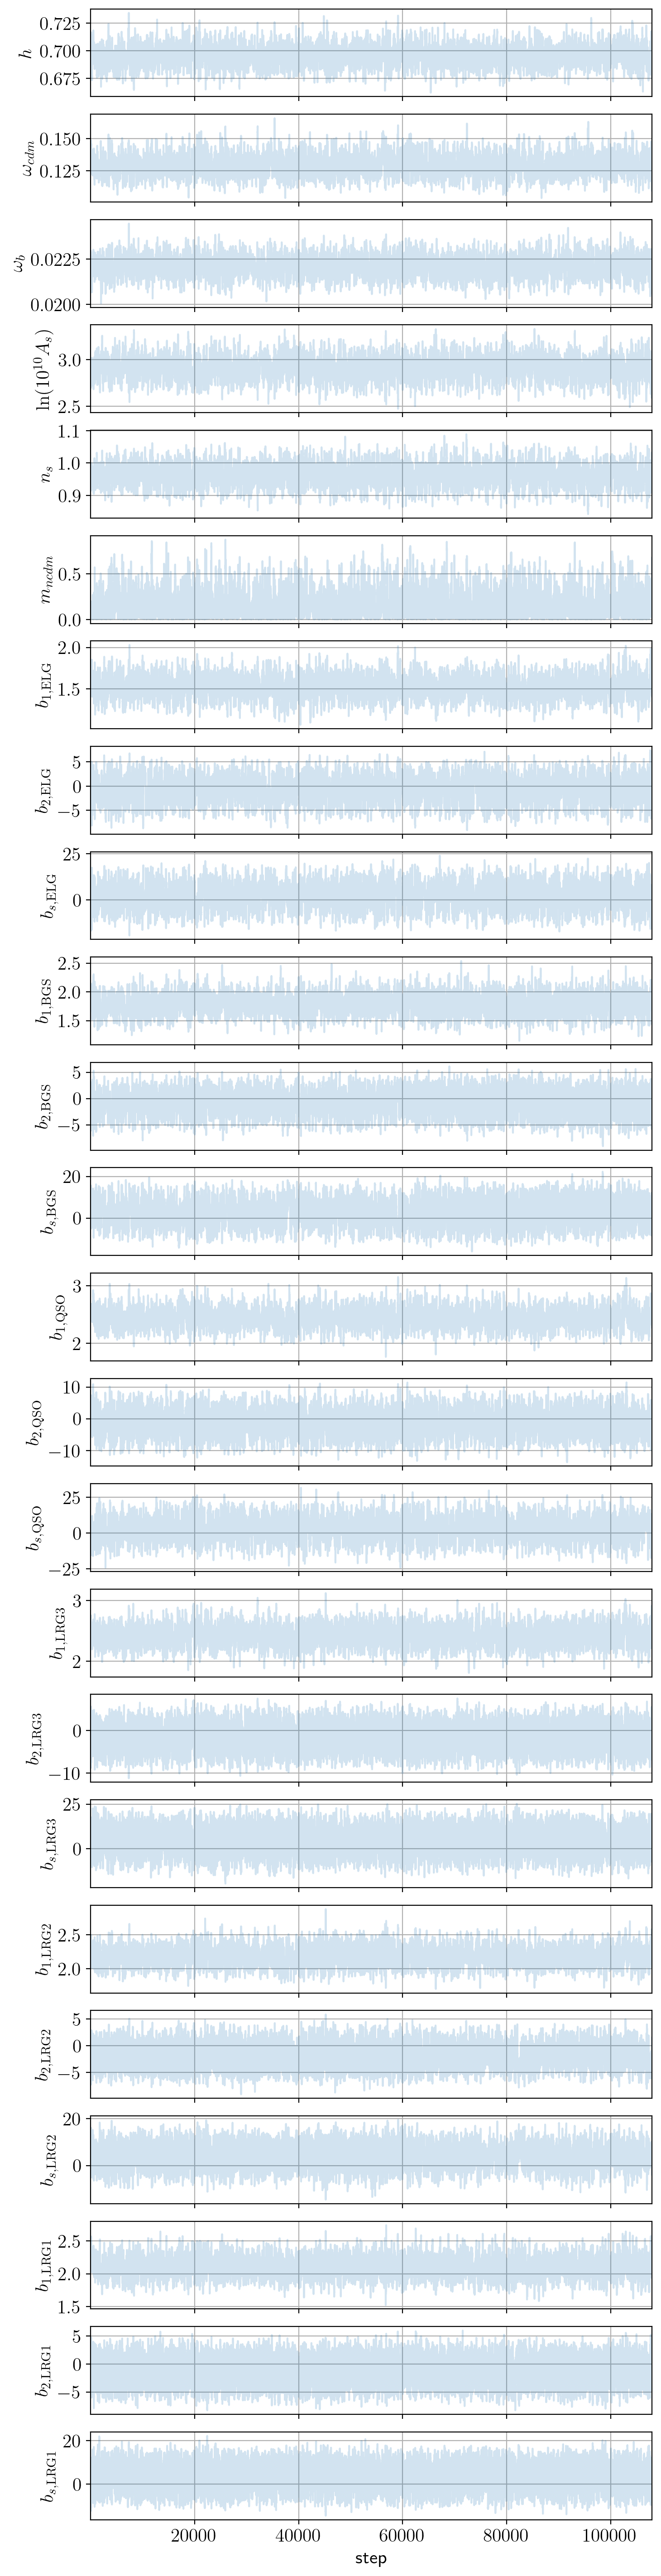

In [6]:
samples_fs_bao = get_sample(fn='/global/cfs/cdirs/desicollab/users/hernannb/__FOLPS_tutorial/part2/chains/MCMC-fs+bao_klim_0-0.02-0.2_2-0.02-0.2-all-GCcomb_schoneberg2024-bbn_planck2018-ns10_standard-prior_EFT_mnu_fk.npy', 
                            params=['h','Omega_m','logA', 'sigma8_m','H0', 'omega_b', 'n_s', 'm_ncdm', 'omega_cdm'],   
                            setparms = ['h', 'omegam', 'logA',  'sigma8', 'H0', 'ombh2', 'ns', 'mnu', 'omch2'],
                            show_steps=True)

#sample_fs_mnu_folpsd_fk = get_sample(fn='/global/cfs/cdirs/desicollab/users/hernannb/_Test-Neutrinos_Waterloo/FOLPSD/FOLPSpipe-main/folps/chains/MCMC-fs-folpsD_klim_0-0.02-0.301_2-0.02-0.301-all-GCcomb_schoneberg2024-bbn_planck2018-ns10_uninf-std-prior_LCDM_folpsD_Mnu_fk.npy',
#                               params=['h','Omega_m','logA', 'sigma8_m','H0', 'omega_b', 'n_s', 'm_ncdm'],
#                               setparms = ['h', 'omegam', 'logA',  'sigma8', 'H0', 'ombh2', 'ns', 'mncdm'],
#                                show_steps=True)

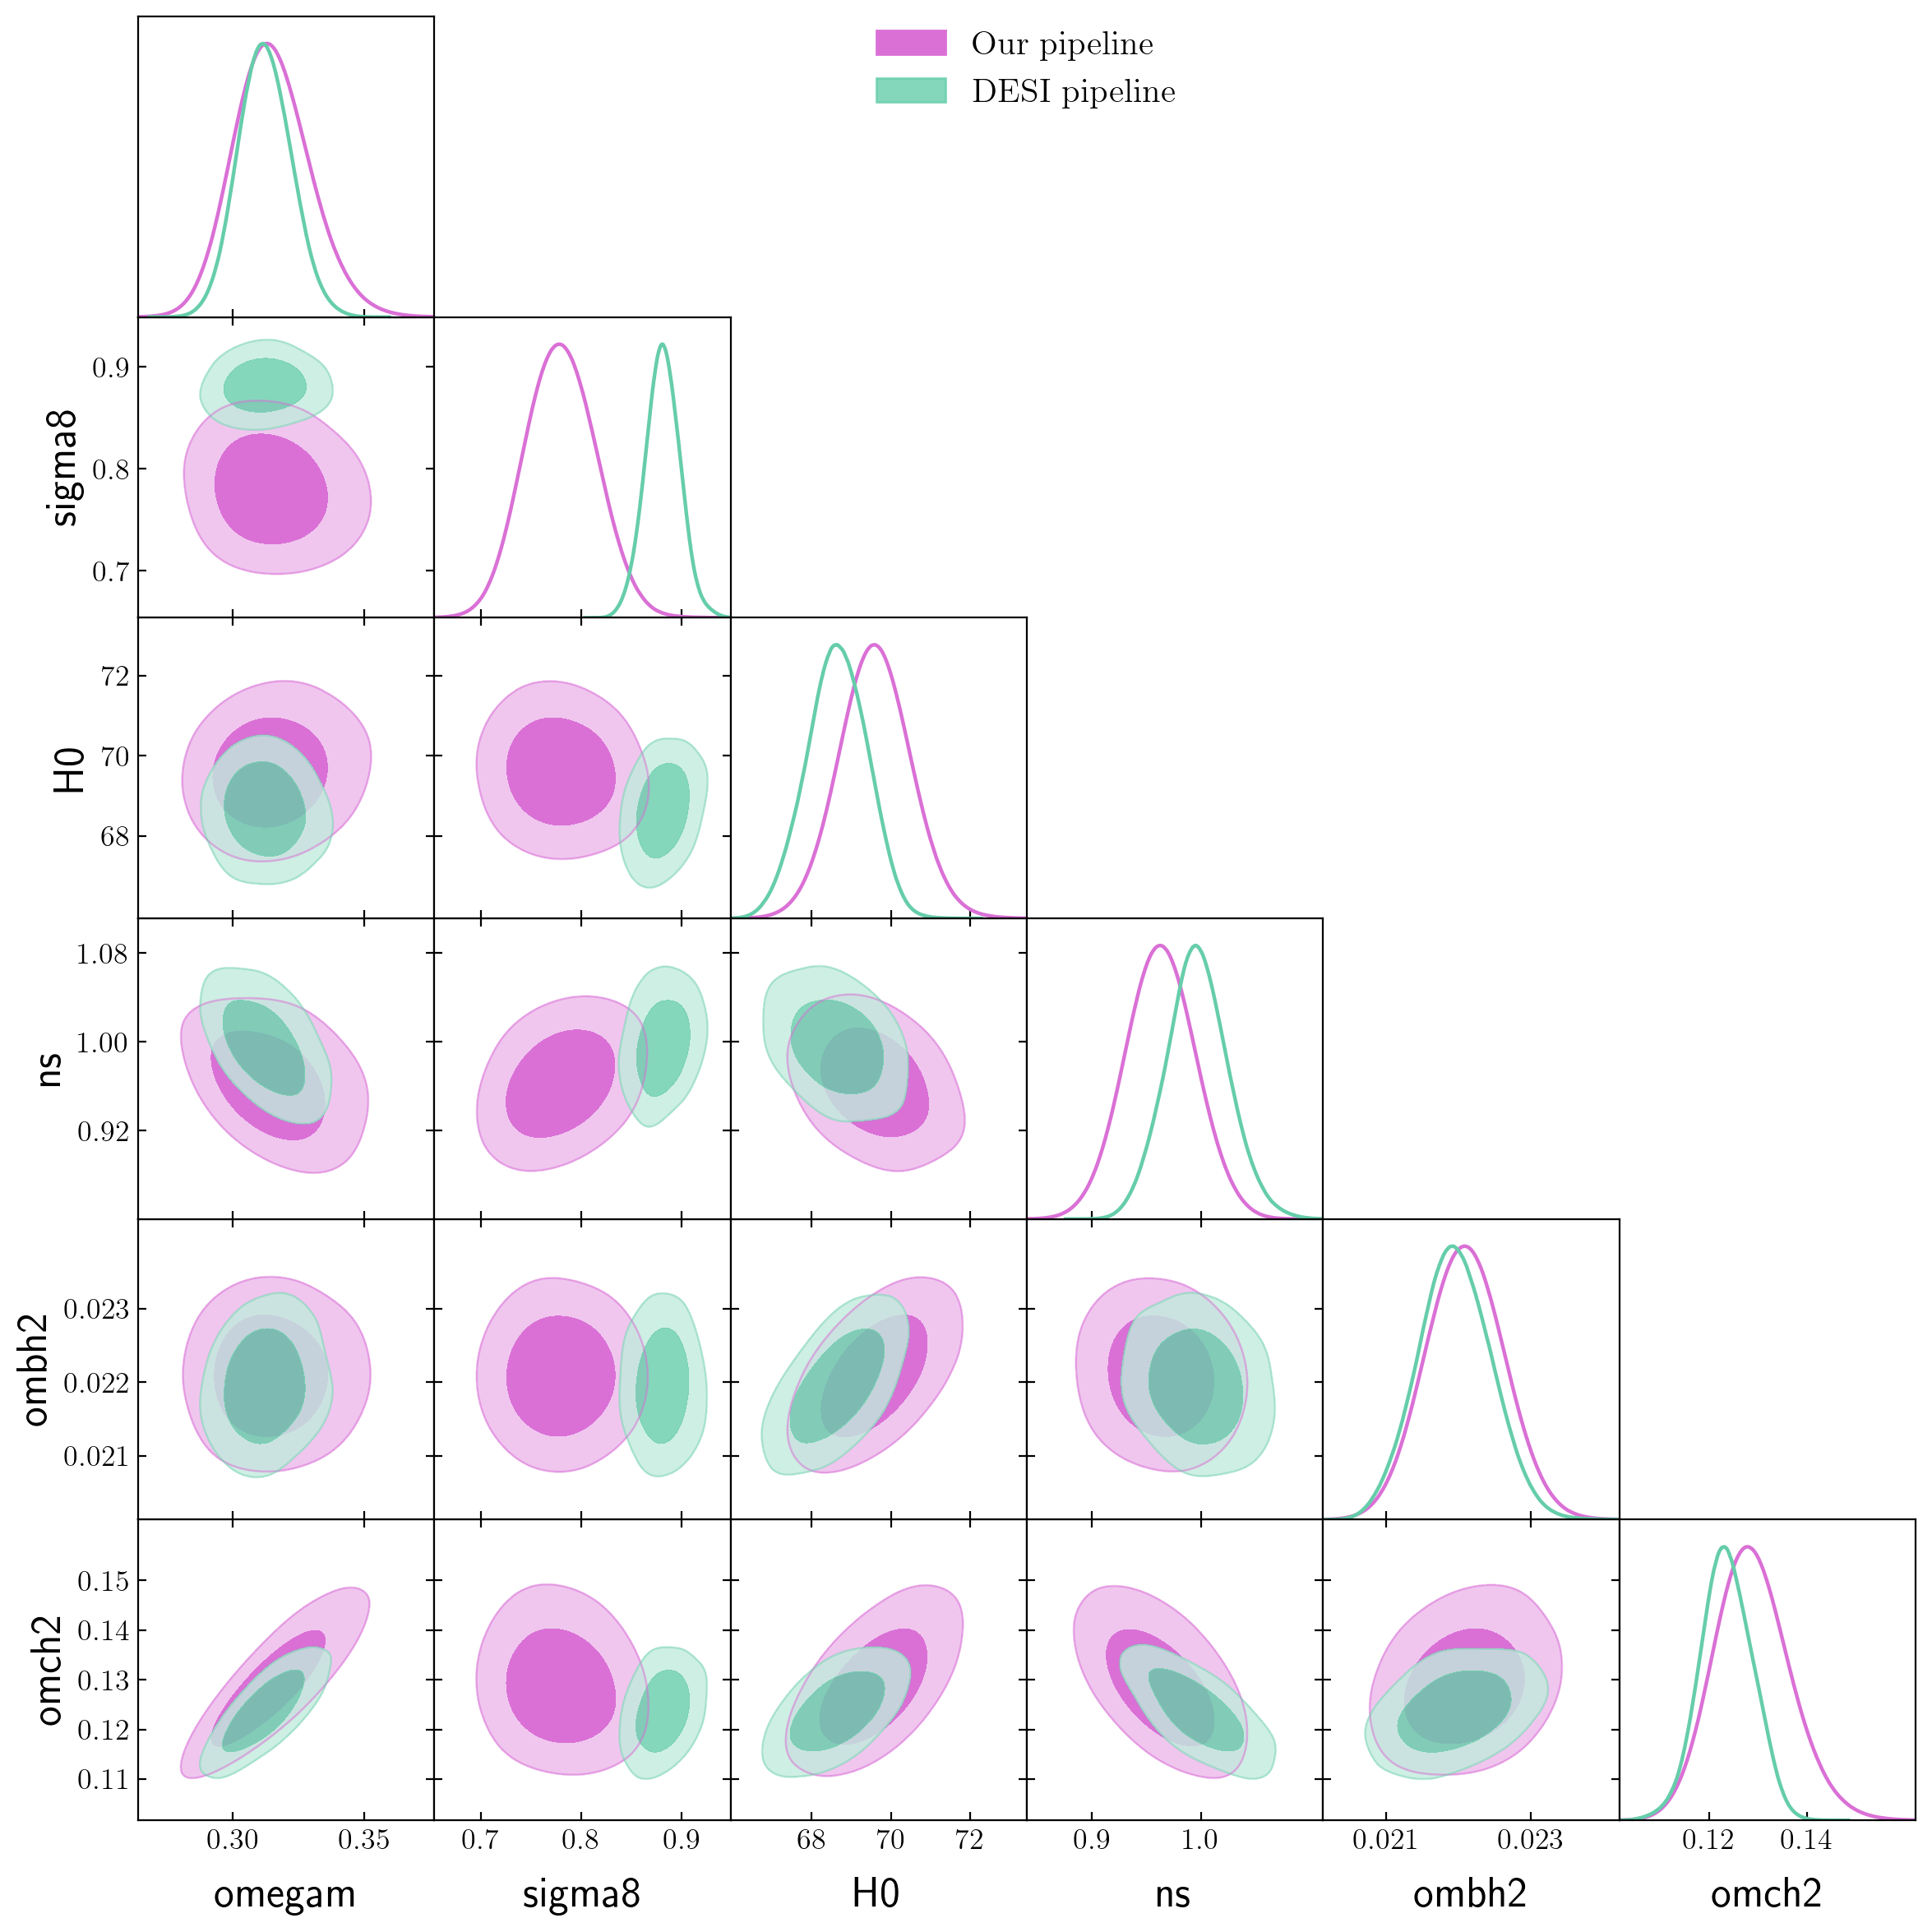

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

gdplot = gdplt.get_subplot_plotter()
gdplot.settings.figure_legend_frame = False
gdplot.settings.alpha_filled_add = 0.8
gdplot.settings.axis_marker_color = 'k'
gdplot.settings.axis_marker_lw = 1.2
gdplot.settings.legend_fontsize =  18#16 #18
gdplot.settings.axes_labelsize = 22  #22
gdplot.settings.axes_fontsize = 16 #16
gdplot.settings.axis_marker_color = 'k'


params = [#'mnu',
          'omegam', 'sigma8', 'H0', 'ns',  'ombh2', 'omch2']

markers = [0.3153, 3.044 , 0.6736*100, 0.9649]

legend_labels = [r'{\rm Our pipeline}',
                 r'{\rm DESI pipeline}',
                 r'{\rm kp7 chain, kmax=0.20}',
                  ]

samples = [  samples_fs_bao  ,
             samples_fs_bao_desipipe
]

gdplot.triangle_plot(samples,\
                     params,\
                     filled=[True,True, False, False, False, False],\
                     contour_ls= ['-', '-', '--', '-.', '--', ':'],\
                     contour_lws= [1.6, 1.6, 1.2, 1.8, 2.0, 3.0],\
                     title_limit=0,#contour_lws=2,
                     contour_colors= ['orchid', 'mediumaquamarine', 'red', 'k', 'navy', 'orange'],
                     figure_kwargs={"figsize": (15,15)},\
                     markers = None,
                     marker_args={'alpha':0.5,'lw':2,'c':'k'},\
                     legend_labels=legend_labels,
                     title=r'd')

#plt.gcf().text(0.55, 0.85, r'${\rm DESI\, BAO + FS + BBN + }\, n_{s10}$', ha='center', va='center', fontsize=16);

#plt.savefig('check_fs_bao.pdf', bbox_inches = 'tight')